In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [2]:
#load input data
X = np.loadtxt("data_clustering.txt", delimiter=",")

In [3]:
#window size. The bigger bandwidth size, The more cluster area get overlapped. (vice versa)
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [4]:
bandwidth_X

1.3044799765090382

In [6]:
#clustering data using mean_shift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [7]:
#get centroids
cluster_centers = meanshift_model.cluster_centers_
print("\nCenters of clusters:\n", cluster_centers)

In [9]:
#estimating the number of centroids
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)


Number of clusters in input data = 5


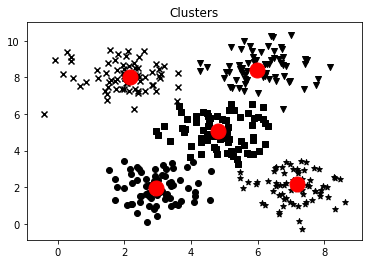

In [13]:
#visualization
plt.figure()
markers = "o*xvs"
for i, marker in zip(range(num_clusters), markers) : 
    #data points by each cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color="black")
    
    #centroid
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker="o", markerfacecolor="red", markeredgecolor="red", markersize=15)
plt.title("Clusters")
plt.show()